In [33]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from sklearn.metrics import f1_score, confusion_matrix

In [39]:
model_nums = []
params = []
trues = []
preds = []
# Specify the directory path
directory_path = '/Users/adamboesky/Research/ay98/Weird_Galaxies/gb_grid_search/big_results'

# Iterate through each file in the directory
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    with open(file_path, 'rb') as f:
        ws, (ts, ps) = pickle.load(f)
        params.append(ws)
        trues.append(np.concatenate(ts))
        preds.append(np.argmax(np.concatenate(ps), axis=1))

In [44]:
# Evaluate all the models by the f1_score
performance = []
for ws, ts, ps in zip(params, trues, preds):
    f1_score(ts, ps, average='macro')
    performance.append(f1_score(ts, ps, average='macro'))

# Get the best model
best_mod_num = np.argmax(performance)
print(f'Best model number is {best_mod_num}\n\tf1_score = {performance[best_mod_num]}\n\tweights = {params[best_mod_num]}')

# Make the confusion matrix
best_cm = confusion_matrix(trues[best_mod_num], preds[best_mod_num])

Best model number is 769
	f1_score = 0.23864596767524052
	weights = {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 5, 'metric': 'multi_logloss', 'max_bin': 50, 'num_iterations': 1000, 'learning_rate': 0.09999999999999999, 'num_leaves': 150}


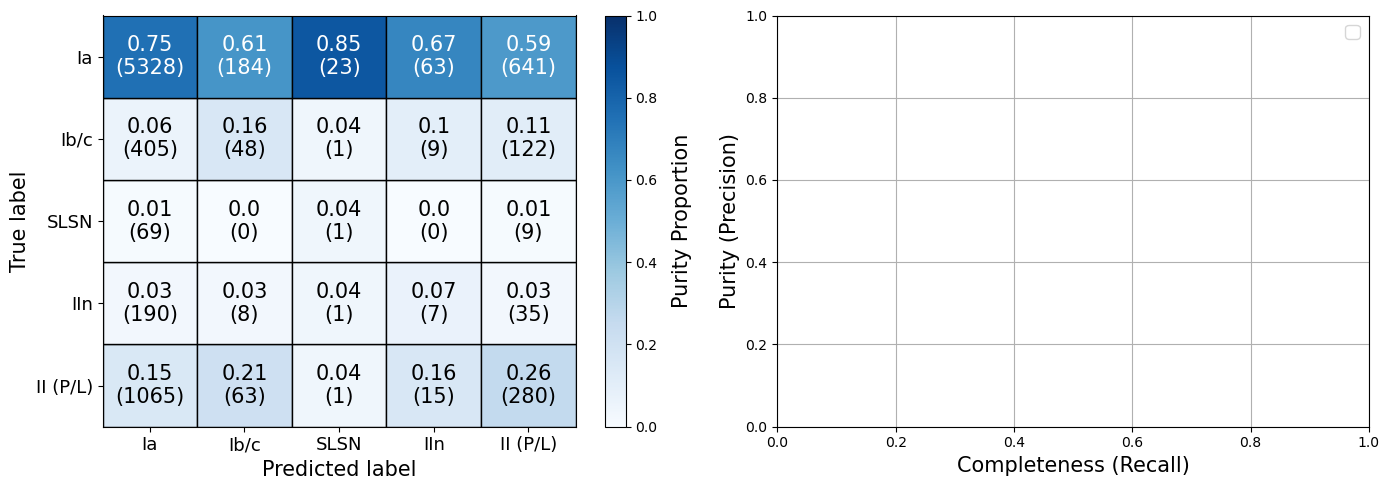

In [45]:
# Assuming cumulative_cm is a 5x5 confusion matrix
# Update the colormap bounds and create a mesh grid for 5 classes
bounds = np.arange(6)
X, Y = np.meshgrid(bounds, bounds)

# Normalize the confusion matrix
cm1 = np.flipud(best_cm)
cm1_col_norms = np.sum(cm1, axis=0)
cm1_norm = cm1 / cm1_col_norms
cm1_norm = cm1_norm.round(2)
cm1_norm[np.isnan(cm1_norm)] = 0

# Plotting the confusion matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
cmap = plt.cm.Blues
norm = plt.Normalize(vmin=0, vmax=1)

for (i, j), z in np.ndenumerate(cm1_norm):
    color = cmap(norm(z))
    ax1.fill_between([j, j+1], [i, i], [i+1, i+1], color=color, edgecolor='black')
    text_color = 'white' if z > 0.5 else 'black'
    ax1.text(j + 0.5, i + 0.5, f'{z}\n({cm1[i, j]})', ha='center', va='center', fontsize=15, color=text_color)

# Set the limits and labels for 5 classes
class_labels = ['Ia', 'Ib/c', 'SLSN', 'IIn', 'II (P/L)']  # Replace with actual class names
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)
ax1.set_xticks(np.arange(0.5, 5.5))
ax1.set_yticks(np.arange(0.5, 5.5))
ax1.set_xticklabels(class_labels)
ax1.set_yticklabels(class_labels[::-1])
ax1.tick_params(axis='both', which='major', labelsize=13)
ax1.grid(False)
ax1.set_xlabel('Predicted label', fontsize=15)
ax1.set_ylabel('True label', fontsize=15)

# Colorbar for the confusion matrix
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax1)
cbar.set_label('Purity Proportion', labelpad=10, fontsize=15)

# Concatenate the arrays in y_tests and y_proba
# if y_tests.ndim != 1:
# if y_tests_sed_only.ndim != 1:
# y_tests_sed_only_concatenated = np.concatenate(y_tests_sed_only)
# y_proba_sed_only_concatenated = np.concatenate(y_proba_sed_only, axis=0)

# Ensure y_proba_concatenated is a 2D array

ax2.set_xlabel('Completeness (Recall)', fontsize=15)
ax2.set_ylabel('Purity (Precision)', fontsize=15)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles=handles, fontsize=13)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.grid(True)

plt.tight_layout()
# plt.savefig('path_to_save_figure.pdf', bbox_inches='tight')
plt.show()

In [32]:
best_params

[0.5, {1: 8.0, 2: 2.8284271247461903, 3: 1.0, 4: 8.0}]

In [28]:
ia_v_rest_cm = np.array([[best_cm[0,0], np.sum(best_cm[0][1:])], [np.sum(best_cm[1:][:,0]), np.sum(best_cm[1:][:,1:])]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


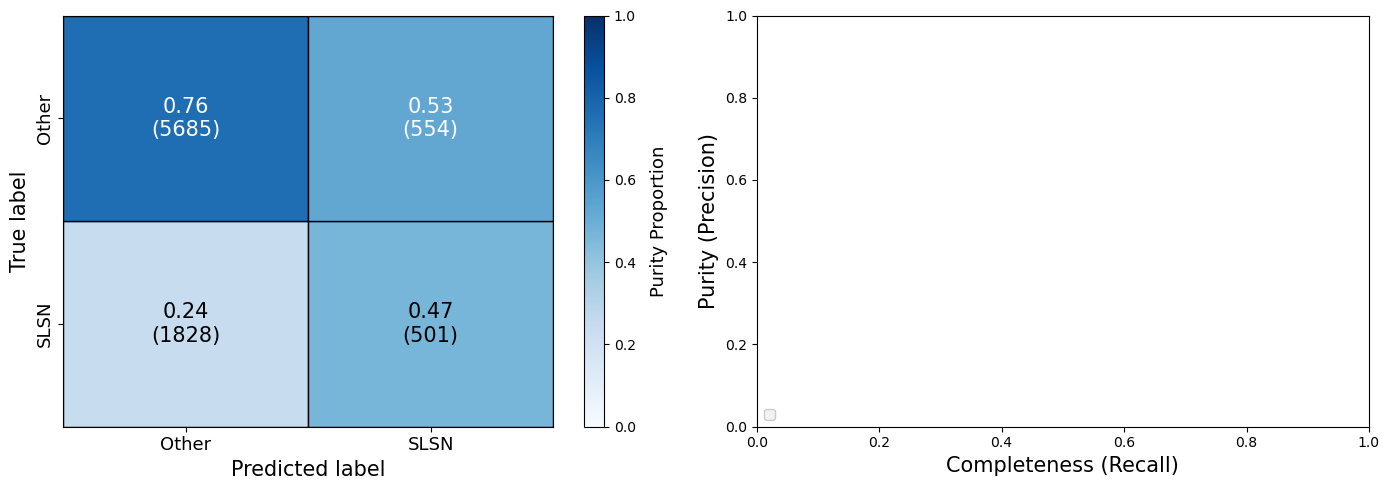

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
cm1 = np.flipud(ia_v_rest_cm)

# Choose a colormapclass_weight
cmap = plt.cm.Blues

# Define the bounds of the boxes
bounds = [0, 1, 2]

# Create a mesh grid
X, Y = np.meshgrid(bounds, bounds)

# Get the confusion normalized matrices
cm1_col_norms = np.sum(cm1, axis=0)
cm1_norm = cm1 / cm1_col_norms
cm1_norm = cm1_norm.round(2)


# Normalize the values for the colormap
norm = plt.Normalize(vmin=0, vmax=1)


for (i, j), z in np.ndenumerate(cm1):
    # Color for the top triangle (cm1)
    color1 = cmap(norm(cm1_norm[i, j]))

    # Split each cell diagonally
    ax1.fill_between([j, j+1], [i, i], [i+1, i+1], color=color1, edgecolor='black')

    # Add text
    if cm1_norm[i, j] > 0.5*norm.vmax: col1 = 'white'
    else: col1 = 'k'
    if cm1_norm[i, j] > 0.5*norm.vmax: col2 = 'white'
    else: col2 = 'k'
    ax1.text(j + 0.5, i + 0.5, '{}\n({})'.format(cm1_norm[i, j], cm1[i, j]), ha='center', va='center', fontsize=15, color=col1)

# Set the limits and labels
ax1.set_xlim(0, 2)
ax1.set_ylim(0, 2)
ax1.set_xticks([0.5, 1.5])
ax1.set_yticks([0.5, 1.5])
ax1.set_xticklabels(["Other", "SLSN"])
ax1.set_yticklabels(["SLSN", "Other"], rotation=90, va='center', ha='right')
ax1.tick_params(axis='both', which='major', labelsize=13)  # Adjust labelsize as needed

# Add grid, labels and title
ax1.grid(False)
ax1.set_ylabel('True label', fontsize=15)
ax1.set_xlabel('Predicted label', fontsize=15)

# Create a ScalarMappable for the colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # You have to set the array for the ScalarMappable

# Create the colorbar
cbar = plt.colorbar(sm, ax=ax1)
cbar.set_label('Purity Proportion', labelpad=10, fontsize=13)


ax2.set_xlabel('Completeness (Recall)', fontsize=15)
ax2.set_ylabel('Purity (Precision)', fontsize=15)
ax2.set_xlim((0, 1))
ax2.set_ylim((0, 1))
ax2.legend(fancybox=True, loc='lower left', framealpha=1, facecolor='#F2F2F2')
plt.tight_layout()
plt.show()